<center><font size = 8><b> House Price  Prediction</b></font></center></br></br>

# Hossam Tarek Elsayed 


In [43]:
#imports

import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
 
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline

## Data disocvrey 

In [44]:
data = pd.read_csv(r"data/housing.csv")

In [45]:
data.sample(15)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
#dropping the 207 entry missing for the data
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

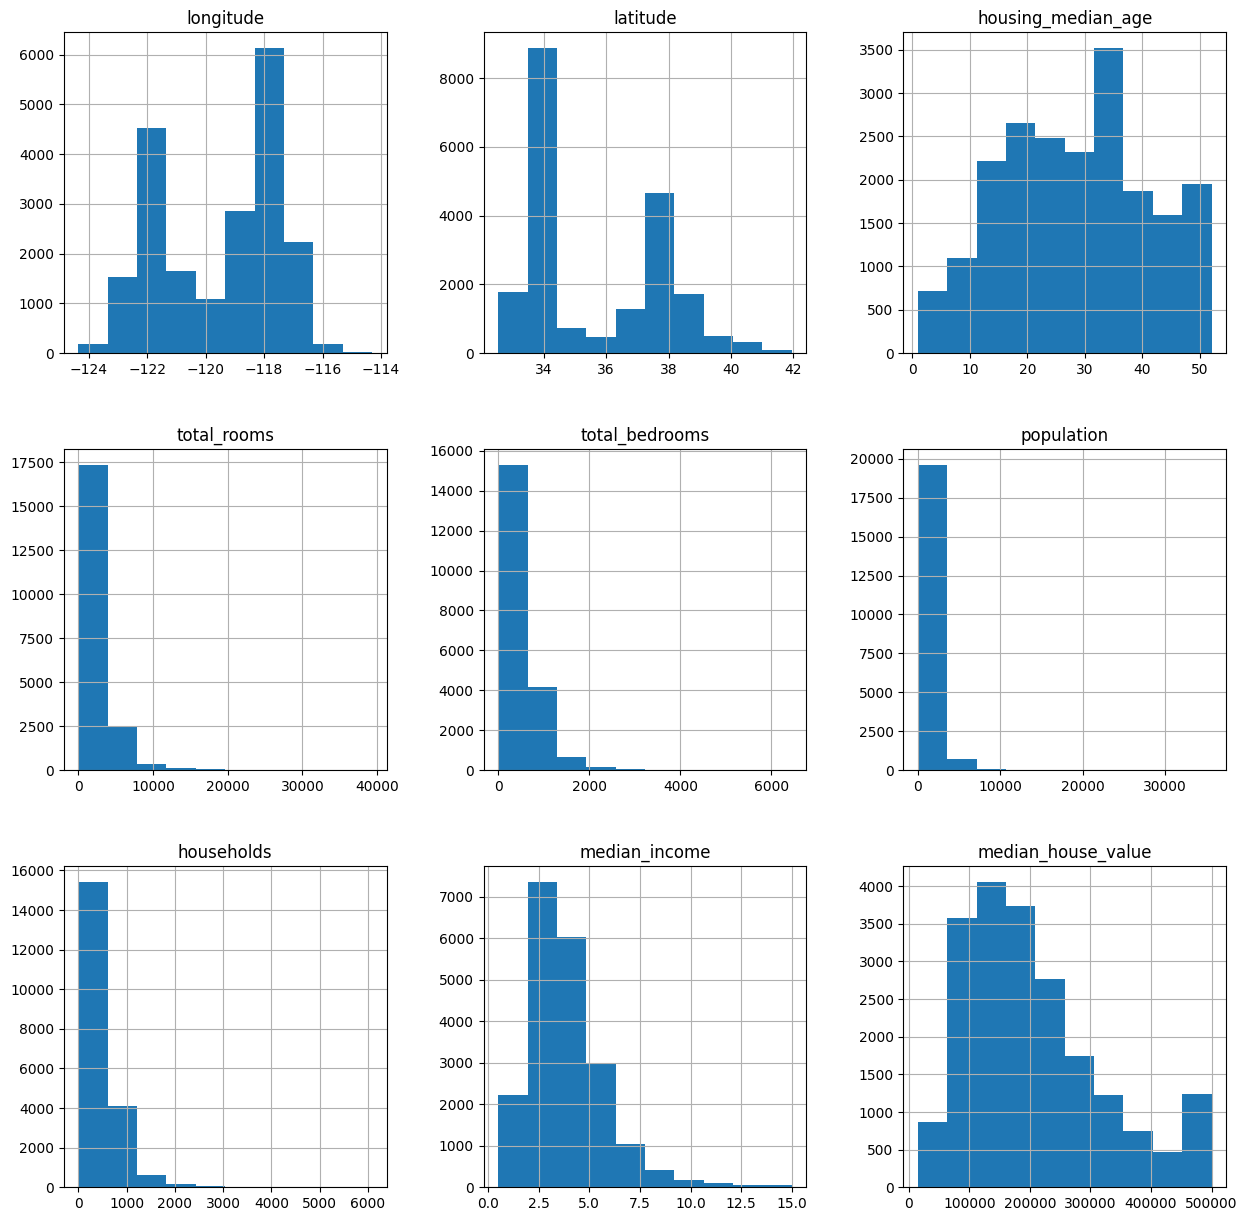

In [47]:
data.hist(figsize=(15,15))

<Axes: >

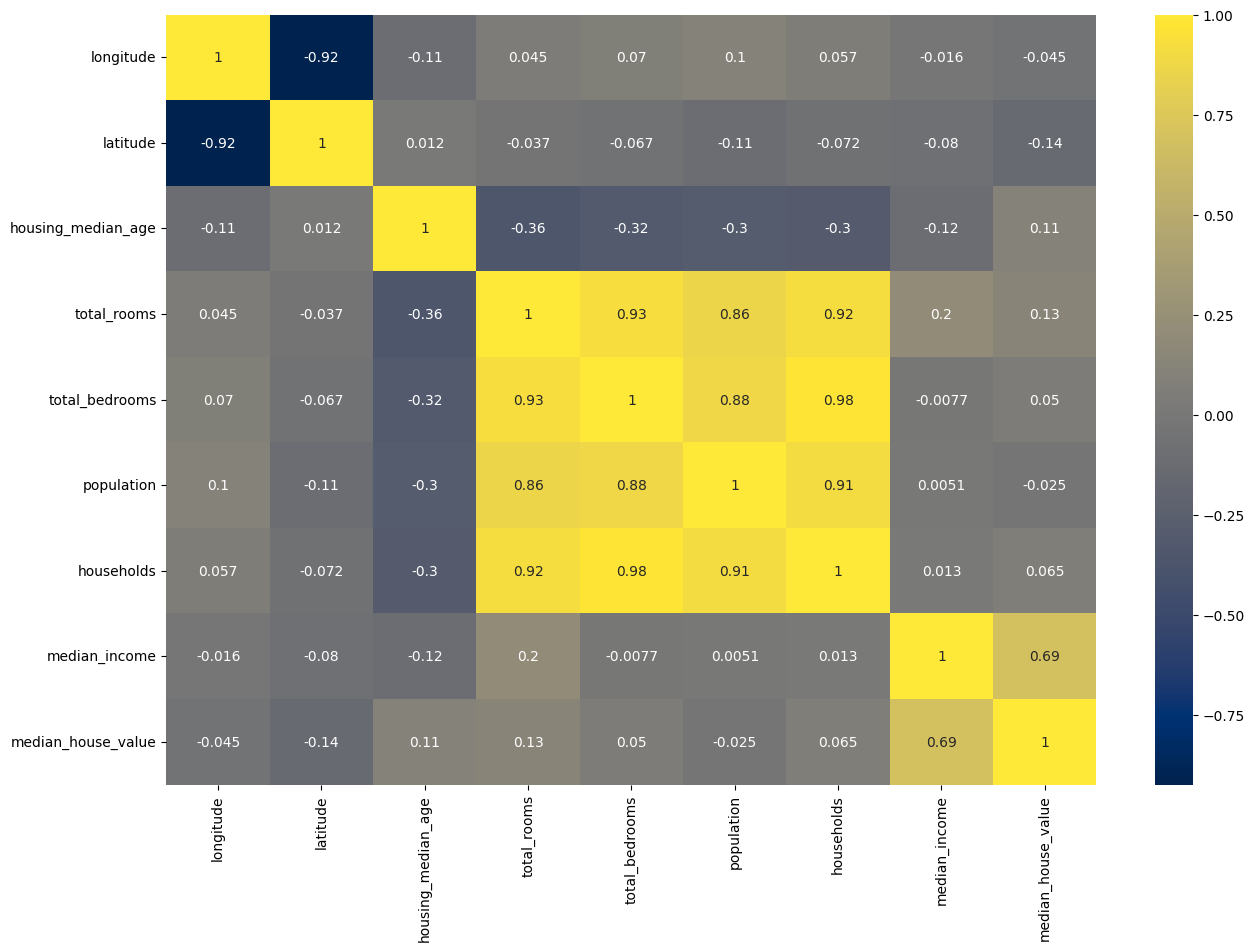

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(data.drop(['ocean_proximity'],axis=1).corr(),annot=True,cmap="cividis")


## Data preprocessing 

In [49]:
# we notice that the 5 features ("total rooms","total bedrooms","population","households") 
data['households']=np.log(data['households']+1)
data['population']=np.log(data['population']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['total_rooms']=np.log(data['total_rooms']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

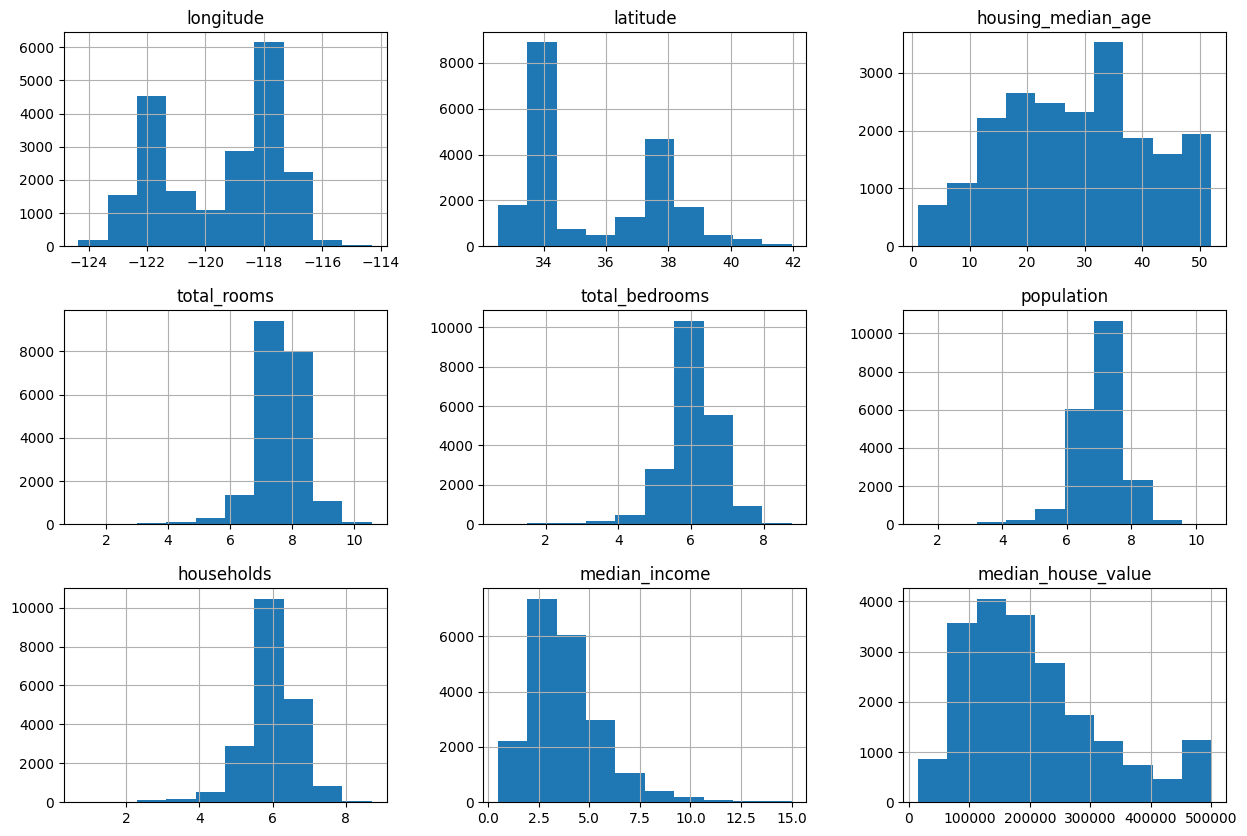

In [50]:
data.hist(figsize=(15,10))

In [51]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [52]:
# convert ocean proximty feature   
data=data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)


<Axes: >

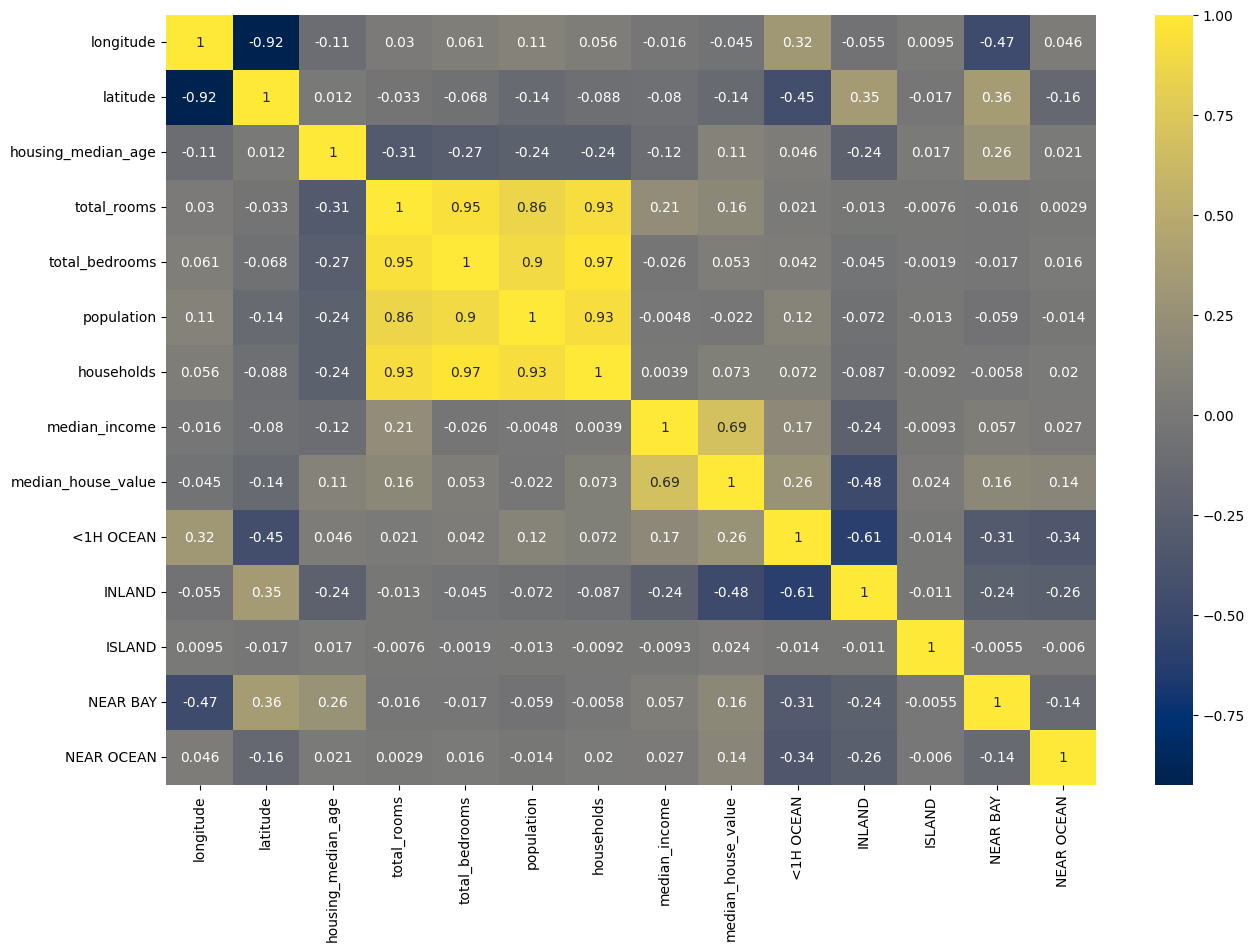

In [53]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True,cmap="cividis")


<Axes: xlabel='latitude', ylabel='longitude'>

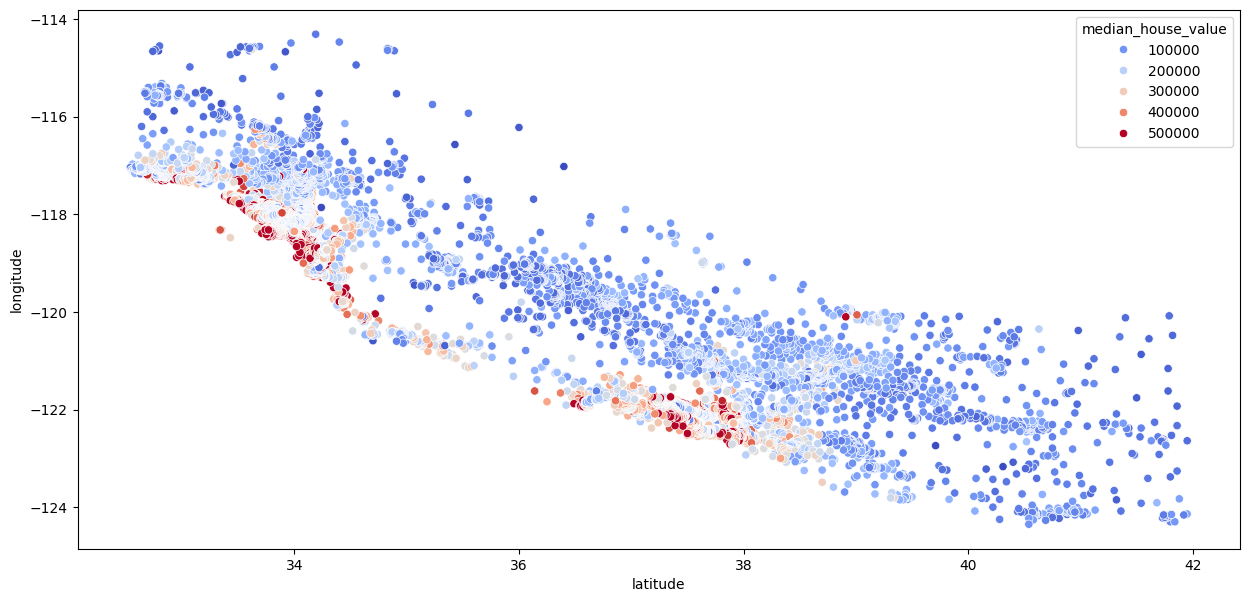

In [54]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="latitude",y="longitude",data=data,hue="median_house_value",palette="coolwarm")

## Feature engineering

In [55]:
data['bedroom_ratio']=data['total_bedrooms'] / data['total_rooms']
data['household_rooms']=data['total_rooms'] / data['households']

<Axes: >

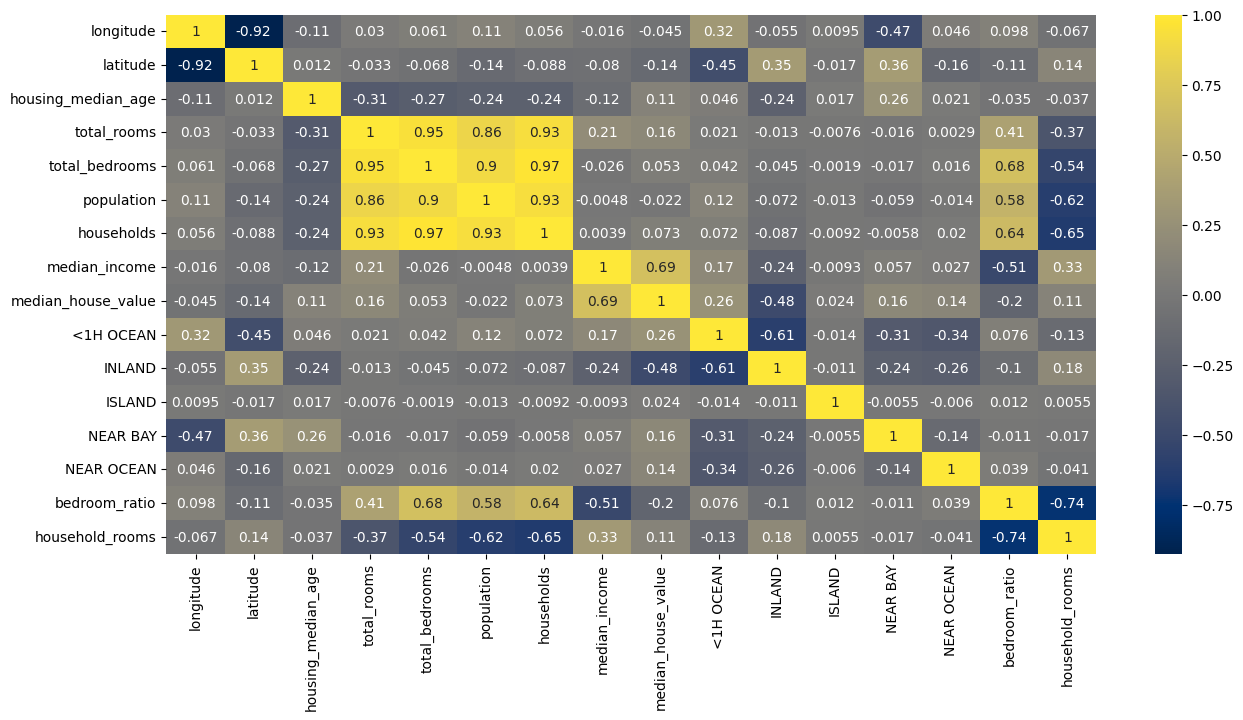

In [56]:
plt.figure(figsize=(15,7))

sns.heatmap(data.corr(),annot=True,cmap="cividis")


Splitting the data to train and test

In [57]:
X=data.drop(['median_house_value'],axis=1)
Y=data['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2498,-120.51,36.55,20.0,7.085064,5.575949,7.150701,5.488938,1.9417,False,True,False,False,False,0.787000,1.290790
4325,-118.36,34.08,52.0,7.583756,6.175867,6.678342,6.113682,3.2824,True,False,False,False,False,0.814355,1.240456
13373,-117.50,34.12,2.0,9.389825,7.497207,8.397734,7.167809,5.2850,False,True,False,False,False,0.798440,1.309999
19400,-120.95,37.74,18.0,8.147288,6.502790,7.580189,6.400257,3.0043,False,True,False,False,False,0.798154,1.272963
7135,-118.10,34.01,42.0,7.270313,5.700444,6.913737,5.700444,3.4297,True,False,False,False,False,0.784071,1.275394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,-118.44,34.02,32.0,7.715570,6.196444,6.826545,6.135565,4.0429,True,False,False,False,False,0.803109,1.257516
8978,-118.41,34.00,38.0,5.783825,4.262680,5.594711,4.304065,2.5500,True,False,False,False,False,0.737000,1.343805
11516,-118.06,33.72,17.0,8.428143,6.843750,7.390181,6.680855,5.7704,False,False,False,False,True,0.812012,1.261537
6877,-118.10,34.07,36.0,8.205765,6.863803,8.247220,6.837333,2.5104,True,False,False,False,False,0.836461,1.200141


## creating the machine learinig models

### Linear regression 

In [58]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_lr=lin_reg.predict(x_test)

In [59]:
lin_reg.score(x_test,y_test)

0.6731557637840959

### RandomForest Regression:


In [70]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
RF.score(x_test,y_test)


0.8173037123477042

In [73]:

# Instantiate the Random Forest Regressor with better parameters
rf = RandomForestRegressor(
    n_estimators=200,
min_samples_leaf=2,
    min_samples_split=3

)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf=rf.predict(x_test)

rf.score(x_test,y_test)
# Calculate and print Mean Squared Error (MSE)


0.8181536788158056

## Finally we visualy compare the two models with the target vaule

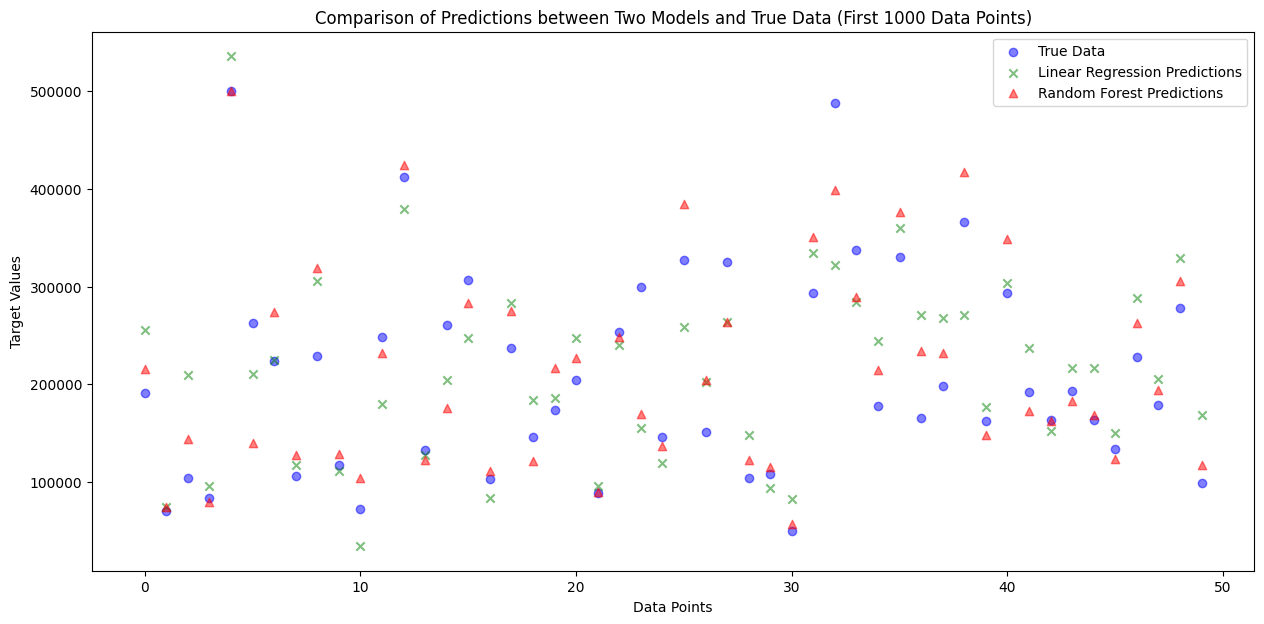

In [84]:

# Select the first 1000 data points for better visualization
num_samples = 50

plt.figure(figsize=(15, 7))

# Plotting true values for the selected subset
plt.scatter(range(num_samples), y_test[:num_samples], label='True Data', color='blue', marker='o', alpha=0.5)

# Plotting predictions from Model 1 (Linear Regression)
plt.scatter(range(num_samples), y_pred_lr[:num_samples], label='Linear Regression Predictions', color='green', marker='x', alpha=0.5)

# Plotting predictions from Model 2 (Random Forest)
plt.scatter(range(num_samples), y_pred_rf[:num_samples], label='Random Forest Predictions', color='red', marker='^', alpha=0.5)

# Adding labels and legend
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.title('Comparison of Predictions between Two Models and True Data (First 100 Data Points)')

plt.show()


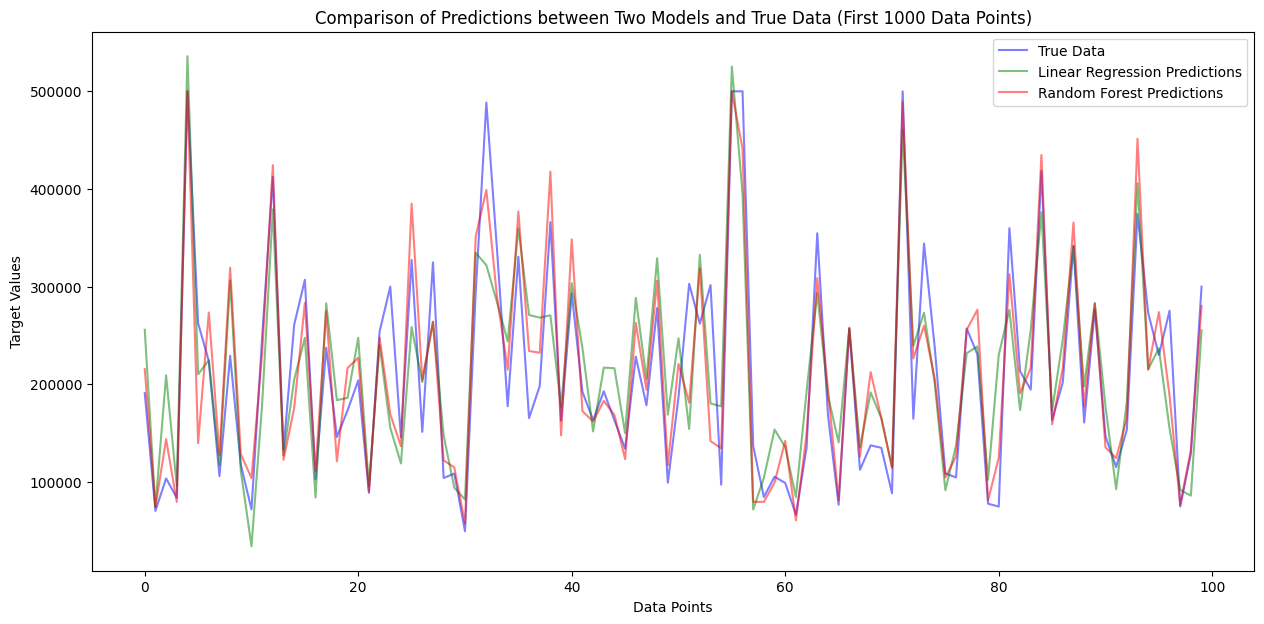

In [86]:
# Select the first 1000 data points for better visualization
num_samples = 100

plt.figure(figsize=(15, 7))

# Plotting true values as lines for the selected subset
plt.plot(range(num_samples), y_test[:num_samples], label='True Data', color='blue', linestyle='-', alpha=0.5)

# Plotting predictions from Model 1 (Linear Regression) as lines
plt.plot(range(num_samples), y_pred_lr[:num_samples], label='Linear Regression Predictions', color='green', linestyle='-', alpha=0.5)

# Plotting predictions from Model 2 (Random Forest) as lines
plt.plot(range(num_samples), y_pred_rf[:num_samples], label='Random Forest Predictions', color='red', linestyle='-', alpha=0.5)

# Adding labels and legend
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.title('Comparison of Predictions between Two Models and True Data (First 100 Data Points)')

plt.show()


## As the number and graphs shows the RandomForest is much better than linear model